# Graph Neural Networks
This is like my playground on Graph Neural Networks (GNN)

# Why GNNs?
Because these networks contains the relationship between the members of it. Especially spatial link!

# What we can do with Graph learning?!
GNN models contain vertices and edges. for example in a social network, people are vertices and their friendship leads to a edge between two nodes. Three main things we can do with graphs:
a)Node Classification
b)Link Prediction
c)Graphs Classification

For example in first application,we classify the people in our network for example to distinguish real and fake users. in this application, some nodes doesnt have label but in classification we use their information too! this is an advantage of these networks and it leads to cluster the learning of GNN under the Semi-Supervised Learning!

## Which libraries I'll use?!
NetworkX is a great library in this field beside DGL and Pytorch geometric.

In [27]:
import networkx as nx

#create graph!
graph = nx.Graph()

#add a node!
graph.add_node(1)
#add nodes!
graph.add_nodes_from([2, 3, 4, 5, 6])

#add an edge
graph. add_edge(1, 2)

#add edges
graph.add_edges_from([(2,3),(3, 4)])

#check nodes and edges
graph.nodes()
graph.edges()


EdgeView([(1, 2), (2, 3), (3, 4)])

# Weighted edges
I talked about link prediction! in most of the problems we use weighted edges!

In [28]:
graph.add_weighted_edges_from([(4, 5, 4.5), (5, 6, 2.5)])

#to see the weights
graph.edges(data = True)


EdgeDataView([(1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 5, {'weight': 4.5}), (5, 6, {'weight': 2.5})])

In [29]:
# You dont need to add all the number of nodes in nfirst stages
# now i'm adding node 7 and 8 with weighted link!
graph.add_weighted_edges_from([(7, 8, 5)])

graph.edges(data = True)

EdgeDataView([(1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 5, {'weight': 4.5}), (5, 6, {'weight': 2.5}), (7, 8, {'weight': 5})])

This creates segmented graph which link 7-8 isn't connected to other part of the graph! 

### How to visualize?

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 10
Average degree:   2.5000


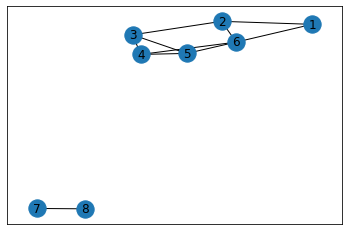

In [69]:
nx.draw_networkx(graph)
print(nx.info(graph))

### We can determine the illustration of graph!

nx.circular_layout(graph)

nx.random_layout(graph)

nx.shell_layout(graph)

nx.spring_layout(graph)

nx.spectral_layout(graph)



{1: Text(1.0, 1.837842732172515e-08, '1'),
 2: Text(0.7071067746131362, 0.7071067741170892, '2'),
 3: Text(-2.4836913168077226e-08, 0.999999999503953, '3'),
 4: Text(-0.7071067368641876, 0.7071067741170892, '4'),
 5: Text(-0.9999999622510514, -6.904434760169175e-08, '5'),
 6: Text(-0.7071067964688312, -0.7071066777555909, '6'),
 7: Text(3.079935470705843e-08, -0.9999999627470983, '7'),
 8: Text(0.7071067150084925, -0.7071068565695219, '8')}

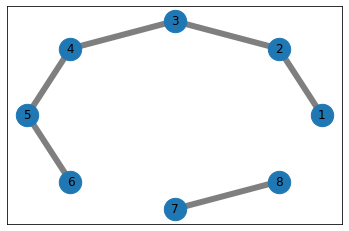

In [31]:
pos = nx.circular_layout(graph) 
#draw nodes
nx.draw_networkx_nodes(graph, pos, node_size=500)

#draw edges
nx.draw_networkx_edges(graph, pos,width=6, alpha=0.5)

#labels: draw nodes name and labels
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_labels(graph, pos,edge_labels=labels)

# Adjancy matrice
Key information of each graph lies in this matrix. It contains relationship information of nodes.
This matrix can provide weights too!

In [32]:
adjacent_m = nx.adj_matrix(graph)
print(adjacent_m.todense())

[[0.  1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  4.5 0.  0.  0. ]
 [0.  0.  0.  4.5 0.  2.5 0.  0. ]
 [0.  0.  0.  0.  2.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  5. ]
 [0.  0.  0.  0.  0.  0.  5.  0. ]]


# Turn nx graph to other formats!
you can use "nx.to_numpy_matrix(graph" to have your matrix as a numpy matrix

Or use "to_scipy_sparse_matrix" to have adjancy matrtix as scipy sparse matrix

In [33]:
z=nx.to_numpy_matrix(graph)
print(z)
print(type(z))

[[0.  1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  4.5 0.  0.  0. ]
 [0.  0.  0.  4.5 0.  2.5 0.  0. ]
 [0.  0.  0.  0.  2.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  5. ]
 [0.  0.  0.  0.  0.  0.  5.  0. ]]
<class 'numpy.matrix'>


In [34]:
sparse_m=nx.to_scipy_sparse_matrix(graph)

print(sparse_m)
sparse_m.todense()

  (0, 1)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (3, 2)	1.0
  (3, 4)	4.5
  (4, 3)	4.5
  (4, 5)	2.5
  (5, 4)	2.5
  (6, 7)	5.0
  (7, 6)	5.0


matrix([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 1. , 0. , 4.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 4.5, 0. , 2.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 5. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 5. , 0. ]])

# Analyse a matrix
We have methods like BFS or DFS!
They are based on iterating on nodes and edges. we call it traversal algorithms!

##### Depth First Search (DFS): 
DFS follows first a path form the starting to the ending node, then another path from the start to end, and so on until all nodes are visited.
DFS uses the stack for traversal of the nodes.

Following method will help us with DFS. I want to iterate from a given startpoint to end node: "nx.dfs_edges(graph,1)"

it takes graph's name and a starting point which in this exaple I choosed 1.
I should mention that it returns a generator.

##### Breadth First Search
proceeds level by level. 
BFS uses the queue for storing the nodes

##### Dijkstra’s Algorithm
It finds the shortest paths between nodes



#### I add other edges to undestand BFS and DFS correctly

In [61]:
graph.add_edges_from([(2,6),(3,5),(1,6),(6,4)])

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]


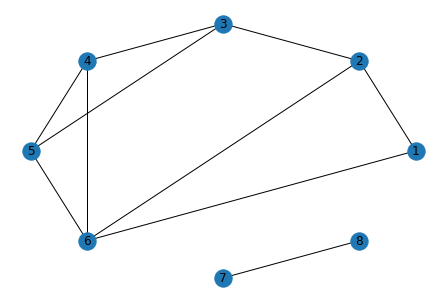

In [62]:
# first we go on DFS
# Starting point is node 1

edges = nx.dfs_edges(graph, 1)
print(list(edges))

# draw to analyse result
nx.draw_circular(graph,with_labels=True)

# What does the results mean?

See the drawing!

I started from node 1. so I dont expect my iteration contains nodes 7 and 8 ( they are seperated)

DFS reported: [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
first a link between 1 and to, then 2 and 3 and like that untill the last node

You know how it iterated? and it cointaned all the nodes! (except 7-8 which are seperated)

[1, 2, 3, 4, 5, 6]


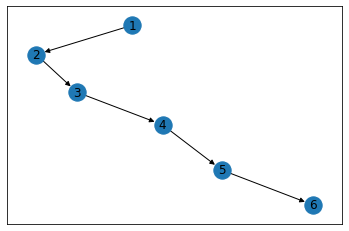

In [65]:
# another way to showing that results
print(list(nx.dfs_tree(graph,1)))

#SHOWING how we iterate till end!
nx.draw_networkx(nx.dfs_tree(graph,1))


[(1, 2), (1, 6), (2, 3), (6, 5), (6, 4)]


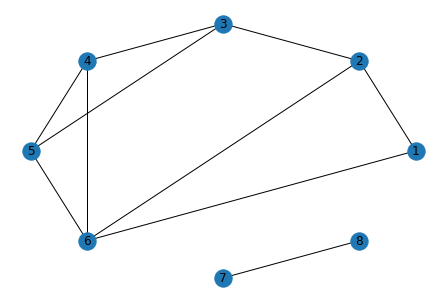

In [66]:
# first we go on BFS
# Starting point is node 1

edges = nx.bfs_edges(graph, 1)
print(list(edges))

# draw to analyse result
nx.draw_circular(graph,with_labels=True)

# What does the results mean?

See the drawing!

I started from node 1. so I dont expect my iteration contains nodes 7 and 8 ( they are seperated)

DFS reported: [(1, 2), (1, 6), (2, 3), (6, 5), (6, 4)]

I started with node 1. what's the children of 1? 6 and 2. so I write (1,2) and (1,6)

Then I start with this two nodes!. children of 2 and then children of 6.

You know how it iterated? and it cointaned all the nodes! (except 7-8 which are seperated)

[1, 2, 6, 3, 5, 4]


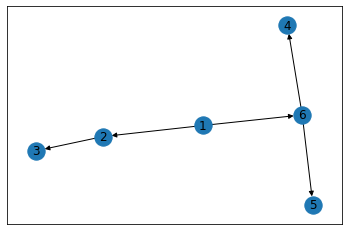

In [67]:
# another way to showing that results
print(list(nx.bfs_tree(graph,1)))

#SHOWING how we iterate till end!
nx.draw_networkx(nx.bfs_tree(graph,1))


In [81]:
#dijkstra will tell you the shortest path

l1=nx.dijkstra_path(graph, 1, 6)
print("the shortest path between 1 and 6 is",l1)

l2=nx.dijkstra_path(graph, 1, 3)
print("the shortest path between 1 and 3 is",l2)

l3=nx.dijkstra_path(graph, 2, 5)
print("the shortest path between 2 and 5 is",l3)



the shortest path between 1 and 6 is [1, 6]
the shortest path between 1 and 3 is [1, 2, 3]
the shortest path between 2 and 5 is [2, 3, 5]


# How to sample Nodes!?
we may need to use node sampling methods to reduce the dimention of our dataset.

### chain sampling


# References

https://cs.mcgill.ca/~wlh/comp766/

https://networkx.github.io/documentation

https://techdifferences.com/difference-between-bfs-and-dfs.html